In [1]:
pwd

'/Users/umakameshwarpappu/Documents/GitHub/Titanic_Analysis'

In [2]:
ls -ltr

total 728
-rwx------@ 1 umakameshwarpappu  staff   28629 Dec 11  2019 test.csv*
-rwx------@ 1 umakameshwarpappu  staff   91737 May 28 00:00 titanic.csv*
-rw-r--r--  1 umakameshwarpappu  staff      47 Jun 20 13:28 README.md
-rw-r--r--  1 umakameshwarpappu  staff   20233 Aug  1 18:04 check.csv
-rw-r--r--  1 umakameshwarpappu  staff  223622 Aug  1 18:16 Titanic_EDA.ipynb


In [3]:
#Data Analysis Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# machine learning
from sklearn.linear_model import LogisticRegression

In [4]:
# train data and test data combined as titanic.csv
df = pd.read_csv('/Users/umakameshwarpappu/Documents/GitHub/Titanic_Analysis/titanic.csv')
df1 = pd.read_csv('/Users/umakameshwarpappu/Documents/GitHub/Titanic_Analysis/test.csv')

In [5]:
print (df)

       Age Cabin Embarked      Fare  \
0     22.0   NaN        S    7.2500   
1     38.0   C85        C   71.2833   
2     26.0   NaN        S    7.9250   
3     35.0  C123        S   53.1000   
4     35.0   NaN        S    8.0500   
...    ...   ...      ...       ...   
1304   NaN   NaN        S    8.0500   
1305  39.0  C105        C  108.9000   
1306  38.5   NaN        S    7.2500   
1307   NaN   NaN        S    8.0500   
1308   NaN   NaN        C   22.3583   

                                                   Name  Parch  PassengerId  \
0                               Braund, Mr. Owen Harris      0            1   
1     Cumings, Mrs. John Bradley (Florence Briggs Th...      0            2   
2                                Heikkinen, Miss. Laina      0            3   
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)      0            4   
4                              Allen, Mr. William Henry      0            5   
...                                                 ...  

In [6]:
print (df1)

     PassengerId  Pclass                                          Name  \
0            892       3                              Kelly, Mr. James   
1            893       3              Wilkes, Mrs. James (Ellen Needs)   
2            894       2                     Myles, Mr. Thomas Francis   
3            895       3                              Wirz, Mr. Albert   
4            896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
..           ...     ...                                           ...   
413         1305       3                            Spector, Mr. Woolf   
414         1306       1                  Oliva y Ocana, Dona. Fermina   
415         1307       3                  Saether, Mr. Simon Sivertsen   
416         1308       3                           Ware, Mr. Frederick   
417         1309       3                      Peter, Master. Michael J   

        Sex   Age  SibSp  Parch              Ticket      Fare Cabin Embarked  
0      male  34.5      0      0 

In [7]:
# submit a csv file with exactly 418 entries plus a header row. 
#The file should have exactly 2 columns:
#PassengerId (sorted in any order)
#Survived (contains your binary predictions: 1 for survived, 0 for deceased)

In [8]:
#general statistics
df.describe()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
count,1046.000000,1308.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,29.881138,33.295479,0.385027,655.000000,2.294882,0.498854,0.377387
std,14.413493,51.758668,0.865560,378.020061,0.837836,1.041658,0.484918
min,0.170000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,21.000000,7.895800,0.000000,328.000000,2.000000,0.000000,0.000000
50%,28.000000,14.454200,0.000000,655.000000,3.000000,0.000000,0.000000
75%,39.000000,31.275000,0.000000,982.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,9.000000,1309.000000,3.000000,8.000000,1.000000


In [9]:
df1.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [10]:
df.head(10)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0,373450
5,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,6,3,male,0,0,330877
6,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,7,1,male,0,0,17463
7,2.0,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",1,8,3,male,3,0,349909
8,27.0,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,9,3,female,0,1,347742
9,14.0,NaN,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,10,2,female,1,1,237736


In [11]:
df1.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [12]:
df.columns

Index(['Age', 'Cabin', 'Embarked', 'Fare', 'Name', 'Parch', 'PassengerId',
       'Pclass', 'Sex', 'SibSp', 'Survived', 'Ticket'],
      dtype='object')

In [13]:
df1.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [14]:
# checking for NULL
df.isna().any()

Age             True
Cabin           True
Embarked        True
Fare            True
Name           False
Parch          False
PassengerId    False
Pclass         False
Sex            False
SibSp          False
Survived       False
Ticket         False
dtype: bool

In [15]:
df1.isna().any()

PassengerId    False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked       False
dtype: bool

In [16]:
#Data Size
df.shape

(1309, 12)

In [17]:
#Data Size
df1.shape

(418, 11)

In [18]:
#some info on data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1046 non-null   float64
 1   Cabin        295 non-null    object 
 2   Embarked     1307 non-null   object 
 3   Fare         1308 non-null   float64
 4   Name         1309 non-null   object 
 5   Parch        1309 non-null   int64  
 6   PassengerId  1309 non-null   int64  
 7   Pclass       1309 non-null   int64  
 8   Sex          1309 non-null   object 
 9   SibSp        1309 non-null   int64  
 10  Survived     1309 non-null   int64  
 11  Ticket       1309 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


In [19]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [20]:
#counts of Age
df["Age"].value_counts()

24.00    47
22.00    43
21.00    41
30.00    40
18.00    39
         ..
20.50     1
11.50     1
22.50     1
0.33      1
60.50     1
Name: Age, Length: 98, dtype: int64

In [21]:
df1["Age"].value_counts()

21.00    17
24.00    17
22.00    16
30.00    15
18.00    13
         ..
0.83      1
22.50     1
26.50     1
40.50     1
60.50     1
Name: Age, Length: 79, dtype: int64

In [22]:
df.groupby('Age').count()

,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
Age,,,,,,,,,,,
0.17,0,1,1,1,1,1,1,1,1,1,1
0.33,0,1,1,1,1,1,1,1,1,1,1
0.42,0,1,1,1,1,1,1,1,1,1,1
0.67,0,1,1,1,1,1,1,1,1,1,1
0.75,0,3,3,3,3,3,3,3,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...
70.50,0,1,1,1,1,1,1,1,1,1,1
71.00,1,2,2,2,2,2,2,2,2,2,2
74.00,0,1,1,1,1,1,1,1,1,1,1


In [23]:
df1.groupby('Age').count()

,PassengerId,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Age,,,,,,,,,,
0.17,1,1,1,1,1,1,1,1,0,1
0.33,1,1,1,1,1,1,1,1,0,1
0.75,1,1,1,1,1,1,1,1,0,1
0.83,1,1,1,1,1,1,1,1,0,1
0.92,1,1,1,1,1,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...
62.00,1,1,1,1,1,1,1,1,0,1
63.00,2,2,2,2,2,2,2,2,1,2
64.00,3,3,3,3,3,3,3,3,3,3


In [24]:
df.groupby(['Sex']).count()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,SibSp,Survived,Ticket
Sex,,,,,,,,,,,
female,388,141,464,466,466,466,466,466,466,466,466
male,658,154,843,842,843,843,843,843,843,843,843


In [25]:
df1.groupby(['Sex']).count()

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Sex,,,,,,,,,,
female,152,152,152,127,152,152,152,152,44,152
male,266,266,266,205,266,266,266,265,47,266


In [26]:
df.groupby('Sex').size()

Sex
female    466
male      843
dtype: int64

In [27]:
df1.groupby('Sex').size()

Sex
female    152
male      266
dtype: int64

In [28]:
# Option1: Splitting the data by Pclass, Sex to get Passenger's count and Survived Count
df.groupby(['Pclass','Sex']).agg({'PassengerId':'count','Survived':'sum'})

PassengerId  Survived
Pclass Sex                          
1      female          144       141
       male            179        45
2      female          106       100
       male            171        17
3      female          216       144
       male            493        47

In [29]:
# Option2: Splitting the data by Pclass, Sex to get Passenger's count and Survived Count
pd.pivot_table(
    df,
    index=['Pclass','Sex'],
    aggfunc={'PassengerId':len,'Survived':len}
)

PassengerId  Survived
Pclass Sex                          
1      female          144       144
       male            179       179
2      female          106       106
       male            171       171
3      female          216       216
       male            493       493

In [30]:
#Number of rows missing values
df.isnull().any(axis=1).sum()

1039

In [31]:
#Number of rows missing values
df1.isnull().any(axis=1).sum()

331

In [32]:
df.shape[0]

1309

In [33]:
df1.shape[0]

418

In [34]:
df_na_percentage = round(100*df.isna().sum()/df.shape[0],2)
print(df_na_percentage)
idx = df_na_percentage.index
#writing the above percentages in a DataFrame and transpose the rows to columns.
#pd.DataFrame().T is the syntax
pd.DataFrame({'NA_Percentage':df_na_percentage}, index=idx).T

Age            20.09
Cabin          77.46
Embarked        0.15
Fare            0.08
Name            0.00
Parch           0.00
PassengerId     0.00
Pclass          0.00
Sex             0.00
SibSp           0.00
Survived        0.00
Ticket          0.00
dtype: float64


,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
NA_Percentage,20.09,77.46,0.15,0.08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
df1_na_percentage = round(100*df1.isna().sum()/df1.shape[0],2)
print(df1_na_percentage)
idx1 = df1_na_percentage.index
#writing the above percentages in a DataFrame and transpose the rows to columns.
#pd.DataFrame().T is the syntax
pd.DataFrame({'NA_Percentage':df1_na_percentage}, index=idx1).T

PassengerId     0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            20.57
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.24
Cabin          78.23
Embarked        0.00
dtype: float64


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
NA_Percentage,0.0,0.0,0.0,0.0,20.57,0.0,0.0,0.0,0.24,78.23,0.0


# Missing Data Imputation

In [36]:
# Missing Data Imputation-Age
# seggregate different groups based on Names/Titles
# find the mean of each such group
# Fill the missing values with mean

#instantiating empty list
TitlesList =[]
#Looping over Names
for rec in df.Name:
    #appending to list.
    TitlesList.append(rec.split(',')[1].strip().split('.')[0])
    
#Assign the list to DataFrame column
df['Title']=TitlesList
#Printing unique list of Titles
for TitleRec in df['Title'].unique():
    print(TitleRec)

#Looping through the unique titles and group by each title, get mean of average
#for that group and assign it to the null values in the same group
for title in df['Title'].unique():
    value = df.loc[(df['Age'].notnull())&(df['Title']==title), 'Age'].mean()
    df.loc[(df['Age'].isnull())&(df['Title']==title), 'Age'] = value

Mr
Mrs
Miss
Master
Don
Rev
Dr
Mme
Ms
Major
Lady
Sir
Mlle
Col
Capt
the Countess
Jonkheer
Dona


In [37]:
#Once Updated checking to see if there are any more rows for Age have NULLs
df_na_percentage = round(100*df.isna().sum()/df.shape[0],2)
idx = df_na_percentage.index
pd.DataFrame({'NA_Percentage':df_na_percentage}, index=idx).T

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title
NA_Percentage,0.0,77.46,0.15,0.08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
#instantiating empty list - df1
TitlesList1 =[]
#Looping over Names
for rec in df1.Name:
    #appending to list.
    TitlesList1.append(rec.split(',')[1].strip().split('.')[0])
    
#Assign the list to DataFrame column
df1['Title']=TitlesList1
#Printing unique list of Titles
for TitleRec1 in df1['Title'].unique():
    print(TitleRec1)

#Looping through the unique titles and group by each title, get mean of average
#for that group and assign it to the null values in the same group
for title in df1['Title'].unique():
    value = df1.loc[(df1['Age'].notnull())&(df1['Title']==title), 'Age'].mean()
    value_rounded = round(value,1)
    df1.loc[(df1['Age'].isnull())&(df1['Title']==title), 'Age'] = value_rounded

Mr
Mrs
Miss
Master
Ms
Col
Rev
Dr
Dona


In [39]:
#Once Updated checking to see if there are any more rows for Age have NULLs
df1_na_percentage = round(100*df1.isna().sum()/df1.shape[0],2)
idx = df1_na_percentage.index
pd.DataFrame({'NA_Percentage':df1_na_percentage}, index=idx).T

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
NA_Percentage,0.0,0.0,0.0,0.0,0.24,0.0,0.0,0.0,0.24,78.23,0.0,0.0


In [40]:
#Cabin Column has 77.6% NULL values. This column can be dropped. 
#But before dropping the column, lets analyze
#Total Passengers by Pclass
df.groupby('Pclass').size()

Pclass
1    323
2    277
3    709
dtype: int64

In [41]:
df1.groupby('Pclass').size()

Pclass
1    107
2     93
3    218
dtype: int64

In [42]:
# Number of records with NULL group by Pclass
df['Cabin'].isna().groupby(df.Pclass).sum()

Pclass
1     67
2    254
3    693
Name: Cabin, dtype: int64

In [43]:
df1['Cabin'].isna().groupby(df1.Pclass).sum()

Pclass
1     27
2     86
3    214
Name: Cabin, dtype: int64

In [44]:
# Percentage of records with NULL group by Pclass
df['Cabin'].isna().groupby(df.Pclass).sum()/df.groupby('Pclass').size()*100

Pclass
1    20.743034
2    91.696751
3    97.743300
dtype: float64

In [45]:
df1['Cabin'].isna().groupby(df1.Pclass).sum()/df1.groupby('Pclass').size()*100

Pclass
1    25.233645
2    92.473118
3    98.165138
dtype: float64

In [46]:
df['Cabin'] = df['Cabin'].str[:1]
print(df['Cabin'].value_counts())

C    94
B    65
D    46
E    41
A    22
F    21
G     5
T     1
Name: Cabin, dtype: int64


In [47]:
df1['Cabin'] = df1['Cabin'].str[:1]
print(df1['Cabin'].value_counts())

C    35
B    18
D    13
E     9
F     8
A     7
G     1
Name: Cabin, dtype: int64


In [48]:
# We see that Pclass 1 has less passengers with out Cabin. 
#Also we noticed that the survived rate is higher in this Pclass
table= pd.pivot_table(
    df,
    index=['Pclass'],
    aggfunc={'PassengerId':len,'Survived':sum}
)
print(table)

        PassengerId  Survived
Pclass                       
1               323       186
2               277       117
3               709       191


In [49]:
# Lets check the survival rate based on the Cabin
#Also we noticed that the survived rate is higher in this Pclass
table= pd.pivot_table(
    df,
    index=['Cabin'],
    aggfunc={'PassengerId':len,'Survived':sum}
)
print(table)

       PassengerId  Survived
Cabin                       
A               22        10
B               65        44
C               94        54
D               46        30
E               41        28
F               21        11
G                5         3
T                1         0


In [50]:
# Lets check the survival rate based on the Cabin and Pclass
#Also we noticed that the survived rate is higher in this Pclass
table= pd.pivot_table(
    df,
    index=['Cabin','Pclass'],
    aggfunc={'PassengerId':len,'Survived':sum}
)
print(table)

              PassengerId  Survived
Cabin Pclass                       
A     1                22        10
B     1                65        44
C     1                94        54
D     1                40        27
      2                 6         3
E     1                34        22
      2                 4         3
      3                 3         3
F     2                13        10
      3                 8         1
G     3                 5         3
T     1                 1         0


In [51]:
table['Survival%']= round((table['Survived'] / table['PassengerId']
                                    )*100
                                   ,2)
print(table)

              PassengerId  Survived  Survival%
Cabin Pclass                                  
A     1                22        10      45.45
B     1                65        44      67.69
C     1                94        54      57.45
D     1                40        27      67.50
      2                 6         3      50.00
E     1                34        22      64.71
      2                 4         3      75.00
      3                 3         3     100.00
F     2                13        10      76.92
      3                 8         1      12.50
G     3                 5         3      60.00
T     1                 1         0       0.00


In [52]:
# We have seen that Class1 has higher survival rate and also have cabin
# values recorded

In [53]:
#Check Embarked column
df.Embarked.isna().sum()

2

In [54]:
#Check Embarked column
df1.Embarked.isna().sum()

0

In [55]:
df.Embarked.notnull().sum()

1307

In [56]:
#Only two records have Embarked as NULL. 
# Hence it can be filled with most occuring value. i.e. mode
df.Embarked.mode()[0]

'S'

In [57]:
df.Embarked.fillna(df.Embarked.mode()[0], inplace=True)

In [58]:
df.Embarked.isna().sum()

0

In [59]:
# Check Fare column
df.Fare.isna().sum()

1

In [60]:
# Check Fare column
df1.Fare.isna().sum()

1

In [61]:
df.loc[df.Fare.isna(),'Pclass']

1043    3
Name: Pclass, dtype: int64

In [62]:
df1.loc[df1.Fare.isna(),'Pclass']

152    3
Name: Pclass, dtype: int64

In [63]:
vPass_Class = df.loc[df.Fare.isna(),'Pclass'].iloc[0]
print(vPass_Class)

3


In [64]:
# Calculate the 'Fare' mean value for Pclass=3
vMean = df.loc[(df.Fare.notnull()) & (df.Pclass == vPass_Class), 'Fare'
              ].mean()
print(vMean)

13.302888700564969


In [65]:
# Update NULL with mean value
df.loc[(df.Fare.isnull()) & (df.Pclass == vPass_Class), 'Fare'] = vMean

In [66]:
#Once Updated checking to see if there are any more rows for Age have NULLs
df_na_percentage = round(100*df.isna().sum()/df.shape[0],2)
idx = df_na_percentage.index
pd.DataFrame({'NA_Percentage':df_na_percentage}, index=idx).T

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title
NA_Percentage,0.0,77.46,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [67]:
vPass_Class1 = df1.loc[df1.Fare.isna(),'Pclass'].iloc[0]
print(vPass_Class1)
# Calculate the 'Fare' mean value for Pclass=3
vMean1 = df1.loc[(df1.Fare.notnull()) & (df1.Pclass == vPass_Class1), 'Fare'
              ].mean()
print(vMean1)
# Update NULL with mean value
df1.loc[(df1.Fare.isnull()) & (df.Pclass == vPass_Class1), 'Fare'] = vMean1

3
12.459677880184334


In [68]:
#Once Updated checking to see if there are any more rows for Age have NULLs
df1_na_percentage = round(100*df1.isna().sum()/df1.shape[0],2)
idx = df1_na_percentage.index
pd.DataFrame({'NA_Percentage':df1_na_percentage}, index=idx).T

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
NA_Percentage,0.0,0.0,0.0,0.0,0.24,0.0,0.0,0.0,0.0,78.23,0.0,0.0


In [69]:
#Mapping Cabin values
cabin_mapping = {"A":1,"B":2,"C":3,"D":4,"E":5,"F":6,"G":7,"T":8}
df['Cabin']=df['Cabin'].map(cabin_mapping)
df['Cabin']=df['Cabin'].fillna(0)
#df1
df1['Cabin']=df1['Cabin'].map(cabin_mapping)
df1['Cabin']=df1['Cabin'].fillna(0)

In [70]:
#Once Updated checking to see if there are any more rows for Age have NULLs
df_na_percentage = round(100*df.isna().sum()/df.shape[0],2)
idx = df_na_percentage.index
pd.DataFrame({'NA_Percentage':df_na_percentage}, index=idx).T

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title
NA_Percentage,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [71]:
#Once Updated checking to see if there are any more rows for Age have NULLs
df1_na_percentage = round(100*df1.isna().sum()/df1.shape[0],2)
idx = df1_na_percentage.index
pd.DataFrame({'NA_Percentage':df1_na_percentage}, index=idx).T

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
NA_Percentage,0.0,0.0,0.0,0.0,0.24,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Features Encoding

#### Age Categories

In [72]:
df1['Age'] = df1['Age'].fillna(0).astype(int)

In [73]:
# All the missing values are filled. 
# Now Lets introduce some features and do some encoding
# Segregating the passengers by Age groups.
bins = [0,1,3,12,21,40,60,100]
#labels = ['Baby','Toddler','Kids','Teen','YoungAdult','Adult','Sr.Citizen']
labels = [1,2,3,4,5,6,7]
df['AgeCategory'] = pd.cut(df.Age, bins = bins, labels=labels, right=True).astype(int)
df1['AgeCategory'] = pd.cut(df1.Age, bins = bins, labels=labels, right=False).astype(int)

In [74]:
df1['AgeCategory'] = pd.cut(df1.Age, bins = bins, labels=labels, right=False).astype(int)

In [75]:
df.AgeCategory.value_counts()

5    783
4    196
6    195
3     61
7     33
1     22
2     19
Name: AgeCategory, dtype: int64

In [76]:
df1.AgeCategory.value_counts()

5    262
6     68
4     46
3     17
7     14
1      6
2      5
Name: AgeCategory, dtype: int64

#### Title

In [77]:
#Ignorig the Title columns with single digit counts as
# majority of the Titles are top 4. Updating the rest to 'NA'
df.Title.value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Mlle              2
Ms                2
Major             2
Don               1
Lady              1
Mme               1
Capt              1
the Countess      1
Dona              1
Sir               1
Jonkheer          1
Name: Title, dtype: int64

In [78]:
df.Title.isin(['Mr','Miss','Mrs','Master'])

0        True
1        True
2        True
3        True
4        True
        ...  
1304     True
1305    False
1306     True
1307     True
1308     True
Name: Title, Length: 1309, dtype: bool

In [79]:
df.loc[~df['Title'].isin(['Mr','Miss','Mrs','Master']),'Title']

30               Don
149              Rev
150              Rev
245               Dr
249              Rev
317               Dr
369              Mme
398               Dr
443               Ms
449            Major
536            Major
556             Lady
599              Sir
626              Rev
632               Dr
641             Mlle
647              Col
660               Dr
694              Col
710             Mlle
745             Capt
759     the Countess
766               Dr
796               Dr
822         Jonkheer
848              Rev
886              Rev
979               Ms
1022             Col
1040             Rev
1055             Rev
1093             Col
1184              Dr
1305            Dona
Name: Title, dtype: object

In [80]:
df.loc[~df['Title'].isin(['Mr','Miss','Mrs','Master']),'Title'] = 'NA'

In [81]:
df1.loc[~df1['Title'].isin(['Mr','Miss','Mrs','Master']),'Title'] = 'NA'

In [82]:
df.Title.value_counts()

Mr        757
Miss      260
Mrs       197
Master     61
NA         34
Name: Title, dtype: int64

In [83]:
df1.Title.value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
NA          7
Name: Title, dtype: int64

In [84]:
# Label Encoding Sex column
df.Sex.unique()

array(['male', 'female'], dtype=object)

In [85]:
# Method 1
df.loc[df['Sex']=='male','Sex']=0
df.loc[df['Sex']=='female','Sex']=1

In [86]:
# Method 2
df['Sex']=np.where(df['Sex']=='male',0,1)
df1['Sex']=np.where(df1['Sex']=='male',0,1)


In [87]:
#Method 3
#df['Sex'].mask(df['Sex'] == 'male', 0, inplace=True)

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1309 non-null   float64
 1   Cabin        1309 non-null   float64
 2   Embarked     1309 non-null   object 
 3   Fare         1309 non-null   float64
 4   Name         1309 non-null   object 
 5   Parch        1309 non-null   int64  
 6   PassengerId  1309 non-null   int64  
 7   Pclass       1309 non-null   int64  
 8   Sex          1309 non-null   int64  
 9   SibSp        1309 non-null   int64  
 10  Survived     1309 non-null   int64  
 11  Ticket       1309 non-null   object 
 12  Title        1309 non-null   object 
 13  AgeCategory  1309 non-null   int64  
dtypes: float64(3), int64(7), object(4)
memory usage: 143.3+ KB


In [89]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    int64  
 4   Age          418 non-null    int64  
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Cabin        418 non-null    float64
 10  Embarked     418 non-null    object 
 11  Title        418 non-null    object 
 12  AgeCategory  418 non-null    int64  
dtypes: float64(2), int64(7), object(4)
memory usage: 42.6+ KB


In [90]:
 #OneHotEncoding of Embarked and Title
dummies = pd.get_dummies(df['Embarked'], prefix=['Embarked'])
df = pd.concat([df,dummies],axis=1)

In [91]:
dummies = pd.get_dummies(df['Title'], prefix=['Title'])
df = pd.concat([df,dummies],axis=1)

In [92]:
 #OneHotEncoding of Embarked and Title
dummies = pd.get_dummies(df1['Embarked'], prefix=['Embarked'])
df1 = pd.concat([df1,dummies],axis=1)

In [93]:
dummies = pd.get_dummies(df1['Title'], prefix=['Title'])
df1 = pd.concat([df1,dummies],axis=1)

In [94]:
df = df.drop(['Embarked','Title'], axis = 1 )
df1 = df1.drop(['Embarked','Title'], axis = 1 )

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1309 non-null   float64
 1   Cabin             1309 non-null   float64
 2   Fare              1309 non-null   float64
 3   Name              1309 non-null   object 
 4   Parch             1309 non-null   int64  
 5   PassengerId       1309 non-null   int64  
 6   Pclass            1309 non-null   int64  
 7   Sex               1309 non-null   int64  
 8   SibSp             1309 non-null   int64  
 9   Survived          1309 non-null   int64  
 10  Ticket            1309 non-null   object 
 11  AgeCategory       1309 non-null   int64  
 12  ['Embarked']_C    1309 non-null   uint8  
 13  ['Embarked']_Q    1309 non-null   uint8  
 14  ['Embarked']_S    1309 non-null   uint8  
 15  ['Title']_Master  1309 non-null   uint8  
 16  ['Title']_Miss    1309 non-null   uint8  


In [96]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PassengerId       418 non-null    int64  
 1   Pclass            418 non-null    int64  
 2   Name              418 non-null    object 
 3   Sex               418 non-null    int64  
 4   Age               418 non-null    int64  
 5   SibSp             418 non-null    int64  
 6   Parch             418 non-null    int64  
 7   Ticket            418 non-null    object 
 8   Fare              418 non-null    float64
 9   Cabin             418 non-null    float64
 10  AgeCategory       418 non-null    int64  
 11  ['Embarked']_C    418 non-null    uint8  
 12  ['Embarked']_Q    418 non-null    uint8  
 13  ['Embarked']_S    418 non-null    uint8  
 14  ['Title']_Master  418 non-null    uint8  
 15  ['Title']_Miss    418 non-null    uint8  
 16  ['Title']_Mr      418 non-null    uint8  
 1

In [97]:
# deriving the family size
df['FamilySize'] = df.SibSp+df.Parch+1
#Traveling Alone?
df['IsTravelingAlone'] = np.where(df['FamilySize']>1,0,1)
print(df[['FamilySize','IsTravelingAlone']])

      FamilySize  IsTravelingAlone
0              2                 0
1              2                 0
2              1                 1
3              2                 0
4              1                 1
...          ...               ...
1304           1                 1
1305           1                 1
1306           1                 1
1307           1                 1
1308           3                 0

[1309 rows x 2 columns]


In [98]:
# deriving the family size
df1['FamilySize'] = df1.SibSp+df1.Parch+1
#Traveling Alone?
df1['IsTravelingAlone'] = np.where(df1['FamilySize']>1,0,1)
print(df1[['FamilySize','IsTravelingAlone']])

     FamilySize  IsTravelingAlone
0             1                 1
1             2                 0
2             1                 1
3             1                 1
4             3                 0
..          ...               ...
413           1                 1
414           1                 1
415           1                 1
416           1                 1
417           3                 0

[418 rows x 2 columns]


In [99]:
#dropping the Object columns
df.drop(['Name','Ticket'], axis =1, inplace = True)
df1.drop(['Name','Ticket'], axis =1, inplace = True)

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1309 non-null   float64
 1   Cabin             1309 non-null   float64
 2   Fare              1309 non-null   float64
 3   Parch             1309 non-null   int64  
 4   PassengerId       1309 non-null   int64  
 5   Pclass            1309 non-null   int64  
 6   Sex               1309 non-null   int64  
 7   SibSp             1309 non-null   int64  
 8   Survived          1309 non-null   int64  
 9   AgeCategory       1309 non-null   int64  
 10  ['Embarked']_C    1309 non-null   uint8  
 11  ['Embarked']_Q    1309 non-null   uint8  
 12  ['Embarked']_S    1309 non-null   uint8  
 13  ['Title']_Master  1309 non-null   uint8  
 14  ['Title']_Miss    1309 non-null   uint8  
 15  ['Title']_Mr      1309 non-null   uint8  
 16  ['Title']_Mrs     1309 non-null   uint8  


In [101]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PassengerId       418 non-null    int64  
 1   Pclass            418 non-null    int64  
 2   Sex               418 non-null    int64  
 3   Age               418 non-null    int64  
 4   SibSp             418 non-null    int64  
 5   Parch             418 non-null    int64  
 6   Fare              418 non-null    float64
 7   Cabin             418 non-null    float64
 8   AgeCategory       418 non-null    int64  
 9   ['Embarked']_C    418 non-null    uint8  
 10  ['Embarked']_Q    418 non-null    uint8  
 11  ['Embarked']_S    418 non-null    uint8  
 12  ['Title']_Master  418 non-null    uint8  
 13  ['Title']_Miss    418 non-null    uint8  
 14  ['Title']_Mr      418 non-null    uint8  
 15  ['Title']_Mrs     418 non-null    uint8  
 16  ['Title']_NA      418 non-null    uint8  
 1

#### Features Correlation

''

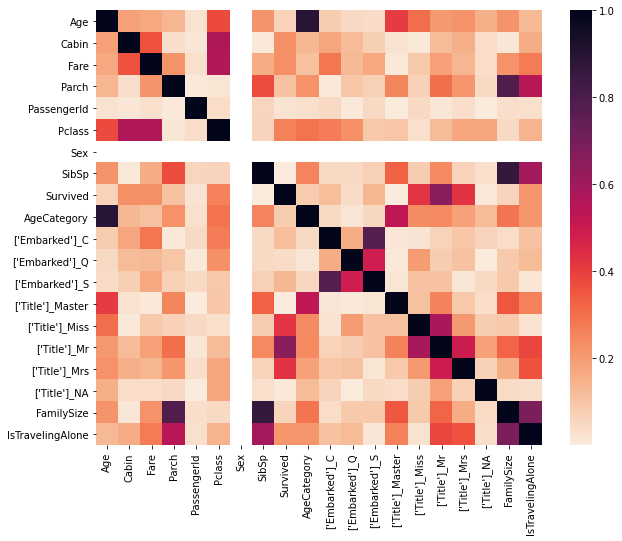

In [102]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(df.corr().abs(),annot=False, ax=ax, cmap='rocket_r')
,

In [103]:
# feature correlation with target variable
df.corr()['Survived'].sort_values(ascending=False)

Survived            1.000000
['Title']_Mrs       0.426025
['Title']_Miss      0.422198
Cabin               0.234407
Fare                0.233785
['Embarked']_C      0.121156
Parch               0.108919
FamilySize          0.061090
['Embarked']_Q      0.040950
['Title']_NA        0.011581
SibSp               0.002370
['Title']_Master   -0.000154
PassengerId        -0.020370
Age                -0.064836
AgeCategory        -0.083196
['Embarked']_S     -0.133020
IsTravelingAlone   -0.216299
Pclass             -0.264710
['Title']_Mr       -0.653221
Sex                      NaN
Name: Survived, dtype: float64

''

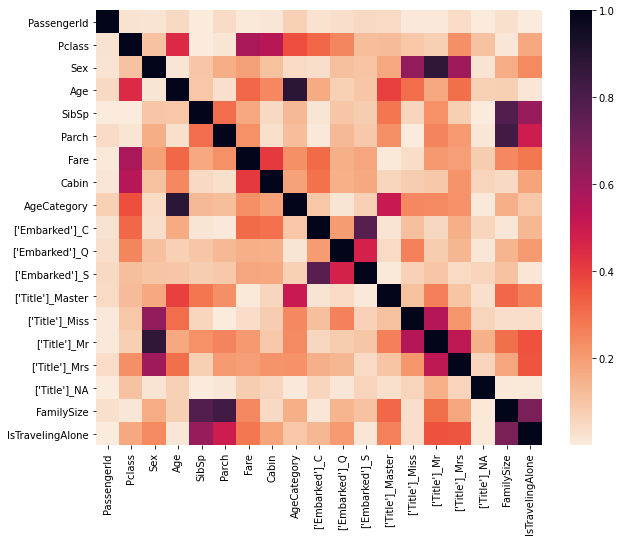

In [104]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(df1.corr().abs(),annot=False, ax=ax, cmap='rocket_r')
,

#### Modeling

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1309 non-null   float64
 1   Cabin             1309 non-null   float64
 2   Fare              1309 non-null   float64
 3   Parch             1309 non-null   int64  
 4   PassengerId       1309 non-null   int64  
 5   Pclass            1309 non-null   int64  
 6   Sex               1309 non-null   int64  
 7   SibSp             1309 non-null   int64  
 8   Survived          1309 non-null   int64  
 9   AgeCategory       1309 non-null   int64  
 10  ['Embarked']_C    1309 non-null   uint8  
 11  ['Embarked']_Q    1309 non-null   uint8  
 12  ['Embarked']_S    1309 non-null   uint8  
 13  ['Title']_Master  1309 non-null   uint8  
 14  ['Title']_Miss    1309 non-null   uint8  
 15  ['Title']_Mr      1309 non-null   uint8  
 16  ['Title']_Mrs     1309 non-null   uint8  


In [106]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PassengerId       418 non-null    int64  
 1   Pclass            418 non-null    int64  
 2   Sex               418 non-null    int64  
 3   Age               418 non-null    int64  
 4   SibSp             418 non-null    int64  
 5   Parch             418 non-null    int64  
 6   Fare              418 non-null    float64
 7   Cabin             418 non-null    float64
 8   AgeCategory       418 non-null    int64  
 9   ['Embarked']_C    418 non-null    uint8  
 10  ['Embarked']_Q    418 non-null    uint8  
 11  ['Embarked']_S    418 non-null    uint8  
 12  ['Title']_Master  418 non-null    uint8  
 13  ['Title']_Miss    418 non-null    uint8  
 14  ['Title']_Mr      418 non-null    uint8  
 15  ['Title']_Mrs     418 non-null    uint8  
 16  ['Title']_NA      418 non-null    uint8  
 1

In [107]:
X_train = df.drop("Survived", axis =1)
Y_train = df["Survived"]
X_train.shape, Y_train.shape

((1309, 19), (1309,))

In [120]:
X_test  = df1.copy()

In [121]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PassengerId       418 non-null    int64  
 1   Pclass            418 non-null    int64  
 2   Sex               418 non-null    int64  
 3   Age               418 non-null    int64  
 4   SibSp             418 non-null    int64  
 5   Parch             418 non-null    int64  
 6   Fare              418 non-null    float64
 7   Cabin             418 non-null    float64
 8   AgeCategory       418 non-null    int64  
 9   ['Embarked']_C    418 non-null    uint8  
 10  ['Embarked']_Q    418 non-null    uint8  
 11  ['Embarked']_S    418 non-null    uint8  
 12  ['Title']_Master  418 non-null    uint8  
 13  ['Title']_Miss    418 non-null    uint8  
 14  ['Title']_Mr      418 non-null    uint8  
 15  ['Title']_Mrs     418 non-null    uint8  
 16  ['Title']_NA      418 non-null    uint8  
 1

In [128]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(class_weight='balanced', random_state=0, solver='lbfgs', max_iter=5000)
logreg.fit(X_train, Y_train)


LogisticRegression(class_weight='balanced', max_iter=5000, random_state=0)

In [129]:
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

85.87

In [130]:
submission = pd.DataFrame({
        "PassengerId": df1["PassengerId"],
        "Survived": Y_pred
    })

In [131]:
submission.to_csv('submission.csv', encoding='utf-8', index=False)